In [41]:
# Rusul Al Busultan A16117117
import pandas as pd 
import matplotlib.pyplot as plt

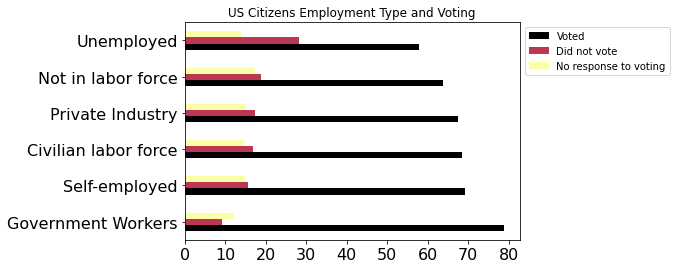

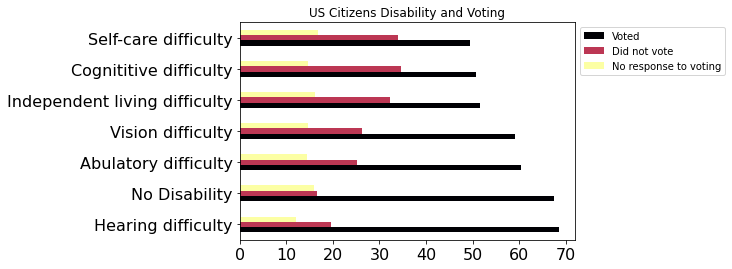

In [42]:
census_data_table_6=pd.read_excel('table06.xlsx',skiprows=4,skipfooter=52,header=[0, 1,2],index_col=[0,1]).fillna(method='ffill')
census_data_table_6.name='Table 6. Reported Voting and Registration by Sex, Employment Status, Class of Worker and Disability Status: November 2020'
census_data_table_6.head()
Update_col_names=[]
for col in census_data_table_6.columns:
    Update_col_names.append(' '.join(col))
Update_index_names=[]
for ind in census_data_table_6.index:
    Update_index_names.append(' '.join(ind))
index_dic={map(Update_index_names,census_data_table_6.index)}
b=census_data_table_6.values[:,:]
census_data_table_6=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
census_data_table_6.head()
# print(census_data_table_6)
s = pd.DataFrame(
    {
        'Voted': census_data_table_6['United States citizen Reported voted Percent'] ,
        'Did not vote': census_data_table_6['United States citizen Reported not voted Percent'],
        'No response to voting': 100 - (census_data_table_6['United States citizen Reported voted Percent'] + census_data_table_6['United States citizen Reported not voted Percent'])
    }, index=census_data_table_6.index
)

plot1 = s.loc[["MALE Total", "FEMALE Total"],['Voted','Did not vote','No response to voting']]
plot2= s.loc[["BOTH SEXES Not in labor force", "BOTH SEXES Civilian labor force", "BOTH SEXES Government Workers","BOTH SEXES Private Industry", "BOTH SEXES Self-employed", "BOTH SEXES Unemployed"],['Voted','Did not vote','No response to voting']]
plot3= s.loc[["DISABILITY STATUS 3 No Disability","DISABILITY STATUS 3 Hearing difficulty","DISABILITY STATUS 3 Vision difficulty","DISABILITY STATUS 3 Cognititive difficulty","DISABILITY STATUS 3 Abulatory difficulty","DISABILITY STATUS 3 Self-care difficulty","DISABILITY STATUS 3 Independent living difficulty"],['Voted','Did not vote','No response to voting']]
plot2[""] = ["Not in labor force","Civilian labor force","Government Workers","Private Industry","Self-employed","Unemployed"]
plot3[""] = ["No Disability","Hearing difficulty","Vision difficulty","Cognititive difficulty","Abulatory difficulty","Self-care difficulty","Independent living difficulty"]
plot2.set_index(plot2[""],inplace=True)
plot3.set_index(plot3[""],inplace=True)

# fig, ax = plt.subplot()
plot2.sort_values('Voted', ascending=False)[['Voted','Did not vote','No response to voting']].plot(kind='barh' ,title='US Citizens Employment Type and Voting',ylabel="Percentage", stacked=False, colormap='inferno',fontsize=16).legend(bbox_to_anchor=(1.0, 1.0))

plot3.sort_values('Voted', ascending=False)[['Voted','Did not vote','No response to voting']].plot(kind='barh', title='US Citizens Disability and Voting', ylabel="Percentage", colormap='inferno',fontsize=16).legend(bbox_to_anchor=(1.0, 1.0))